Proyecto 2: Análisis y Selección de Problema

Parte II: Preprocesamiento y Optimización

Objetivo: Realizar el preprocesamiento de datos y la optimización de modelos de machine learning para el conjunto de datos seleccionado. La meta es elegir la técnica de machine learning más adecuada y optimizar sus hiperparámetros para obtener el mejor rendimiento posible.

In [313]:
# Carga de bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
# biblioteca google.
from google.colab import drive
# conecta colab con drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [243]:
path ="/content/drive/MyDrive/CLASE MACHINE LEARNING/DATA_CORES/selected_dataset.csv"
df = pd.read_csv(path)

In [244]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [246]:
df.shape

(1197, 15)

In [247]:
df.describe().round(2)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.00,1197.00,1197.00,691.00,1197.00,1197.00,1197.00,1197.00,1197.00,1197.00,1197.00
mean,6.43,0.73,15.06,1190.47,4567.46,38.21,0.73,0.37,0.15,34.61,0.74
std,3.46,0.10,10.94,1837.46,3348.82,160.18,12.71,3.27,0.43,22.20,0.17
min,1.00,0.07,2.90,7.00,0.00,0.00,0.00,0.00,0.00,2.00,0.23
25%,3.00,0.70,3.94,774.50,1440.00,0.00,0.00,0.00,0.00,9.00,0.65
50%,6.00,0.75,15.26,1039.00,3960.00,0.00,0.00,0.00,0.00,34.00,0.77
75%,9.00,0.80,24.26,1252.50,6960.00,50.00,0.00,0.00,0.00,57.00,0.85
max,12.00,0.80,54.56,23122.00,25920.00,3600.00,300.00,45.00,2.00,89.00,1.12


In [248]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ","_")

In [249]:
#  Verificar duplicados
df.duplicated().sum()

np.int64(0)

In [250]:
# Verificar Nulos
df.isna().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [251]:
# Verifiar nulos columna 'wip'
df["wip"].isna().sum()

np.int64(506)

In [252]:
df["wip"].value_counts()

,count
wip,
1039.0,5
1282.0,4
1079.0,3
1193.0,3
1069.0,3
...,...
357.0,1
817.0,1
1576.0,1


In [253]:
# Se imputa los nulos con el promedio columna 'wip'
df["wip"] = df["wip"].fillna(df["wip"].mean())

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [255]:
#  Se cambia el tipo de dato object a datetime
df["date"] = pd.to_datetime(df["date"])

In [256]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [257]:
df["quarter"].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [258]:
# Se pasa columna quarter, day  a int
cuart = {'Quarter1':1,
         'Quarter2':2,
         'Quarter3':3,
         'Quarter4':4,
         'Quarter5':5
         }
df["quarter"] = df["quarter"].map(cuart)


In [259]:
df["day"].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [260]:
# Se pasa los dias a numeros
dia = {'Thursday':4,
       'Saturday':6,
         'Sunday':7,
         'Monday':1,
        'Tuesday':2,
      'Wednesday':3,
       'Thursday':4,
       'Saturday':6,
         'Sunday':7
         }
df["day"] = df["day"].map(dia)

In [261]:
df[df["no_of_style_change"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,1,sweing,4,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,1,finishing,4,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,1,sweing,4,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,1,sweing,4,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,1,sweing,4,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,2,finishing,3,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,2015-03-11,2,finishing,3,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,2015-03-11,2,finishing,3,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,2015-03-11,2,finishing,3,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [262]:
df[df["idle_men"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,1,sweing,4,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,1,finishing,4,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,1,sweing,4,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,1,sweing,4,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,1,sweing,4,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,2,finishing,3,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,2015-03-11,2,finishing,3,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,2015-03-11,2,finishing,3,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,2015-03-11,2,finishing,3,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [263]:
df[df["idle_time"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,1,sweing,4,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,1,finishing,4,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,1,sweing,4,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,1,sweing,4,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,1,sweing,4,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,2,finishing,3,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0.628333
1193,2015-03-11,2,finishing,3,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1194,2015-03-11,2,finishing,3,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0.625625
1195,2015-03-11,2,finishing,3,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0.505889


In [264]:
df[df["over_time"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2015-02-09,2,sweing,1,11,0.75,10.05,103.000000,0,45,0.0,0,0,54.0,0.750648
694,2015-02-10,2,sweing,2,10,0.80,22.52,1268.000000,0,88,0.0,0,0,56.0,0.900632
695,2015-02-10,2,sweing,2,1,0.80,22.52,1546.000000,0,88,0.0,0,0,57.0,0.900471
696,2015-02-10,2,sweing,2,3,0.80,22.52,813.000000,0,88,0.0,0,0,57.0,0.900471
697,2015-02-10,2,sweing,2,2,0.80,22.52,1512.000000,0,88,0.0,0,0,57.0,0.899984
713,2015-02-11,2,sweing,3,2,0.80,22.52,1557.000000,0,90,0.0,0,0,57.5,1.000345
714,2015-02-11,2,sweing,3,1,0.80,22.52,1498.000000,0,113,0.0,0,0,57.0,1.000066
718,2015-02-11,2,sweing,3,10,0.80,22.52,598.000000,0,75,0.0,0,0,56.0,0.850365
730,2015-02-12,2,sweing,4,1,0.80,22.52,1397.000000,0,138,0.0,0,0,57.0,1.100484
732,2015-02-12,2,sweing,4,2,0.80,22.52,1327.000000,0,113,0.0,0,0,57.5,1.000345


In [265]:
# Se elimina  columna no_of_style_change tiene 1050 datos con 0 de 1197
# Se eliminar columna idle_men tiene 1179 datos en 0 de 1197
# Se elimina  columna idle_time de 1197 tiene 1179 datos en 0
# Se elimina  columna over_time.
df.drop(columns=['no_of_style_change', 'idle_men', 'idle_time', 'over_time'], inplace=True)

In [266]:
df.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
date,1197,2015-02-04 10:56:50.526315776,2015-01-01 00:00:00,2015-01-18 00:00:00,2015-02-03 00:00:00,2015-02-23 00:00:00,2015-03-11 00:00:00,NaN
quarter,1197.0,2.399332,1.0,1.0,2.0,3.0,5.0,1.215535
day,1197.0,3.812865,1.0,2.0,3.0,6.0,7.0,2.112252
team,1197.0,6.426901,1.0,3.0,6.0,9.0,12.0,3.463963
targeted_productivity,1197.0,0.729632,0.07,0.7,0.75,0.8,0.8,0.097891
smv,1197.0,15.062172,2.9,3.94,15.26,24.26,54.56,10.943219
wip,1197.0,1190.465991,7.0,970.0,1190.465991,1190.465991,23122.0,1395.647261
incentive,1197.0,38.210526,0.0,0.0,0.0,50.0,3600.0,160.182643
no_of_workers,1197.0,34.609858,2.0,9.0,34.0,57.0,89.0,22.197687
actual_productivity,1197.0,0.735091,0.233705,0.650307,0.773333,0.850253,1.120437,0.174488


In [267]:
df[df["incentive"] == 38.21]["incentive"].astype(float)

,incentive


In [268]:
# Se imputa columna incentive por el promedio
pmp = df["incentive"].mean().round(2)
df.loc[df["incentive"] == 0, "incentive"] = pmp

/tmp/ipython-input-268-2698698921.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '38.21' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["incentive"] == 0, "incentive"] = pmp


In [269]:
df["incentive"].dtypes

dtype('float64')

In [270]:
df["actual_productivity"].value_counts()

,count
actual_productivity,
0.800402,24
0.850137,12
0.971867,12
0.850502,11
0.750651,11
...,...
0.894444,1
0.900061,1
0.909392,1


In [271]:
df.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
date,1197,2015-02-04 10:56:50.526315776,2015-01-01 00:00:00,2015-01-18 00:00:00,2015-02-03 00:00:00,2015-02-23 00:00:00,2015-03-11 00:00:00,NaN
quarter,1197.0,2.399332,1.0,1.0,2.0,3.0,5.0,1.215535
day,1197.0,3.812865,1.0,2.0,3.0,6.0,7.0,2.112252
team,1197.0,6.426901,1.0,3.0,6.0,9.0,12.0,3.463963
targeted_productivity,1197.0,0.729632,0.07,0.7,0.75,0.8,0.8,0.097891
smv,1197.0,15.062172,2.9,3.94,15.26,24.26,54.56,10.943219
wip,1197.0,1190.465991,7.0,970.0,1190.465991,1190.465991,23122.0,1395.647261
incentive,1197.0,57.491094,21.0,38.21,38.21,50.0,3600.0,156.681464
no_of_workers,1197.0,34.609858,2.0,9.0,34.0,57.0,89.0,22.197687
actual_productivity,1197.0,0.735091,0.233705,0.650307,0.773333,0.850253,1.120437,0.174488


#### Preprocesamiento de Datos

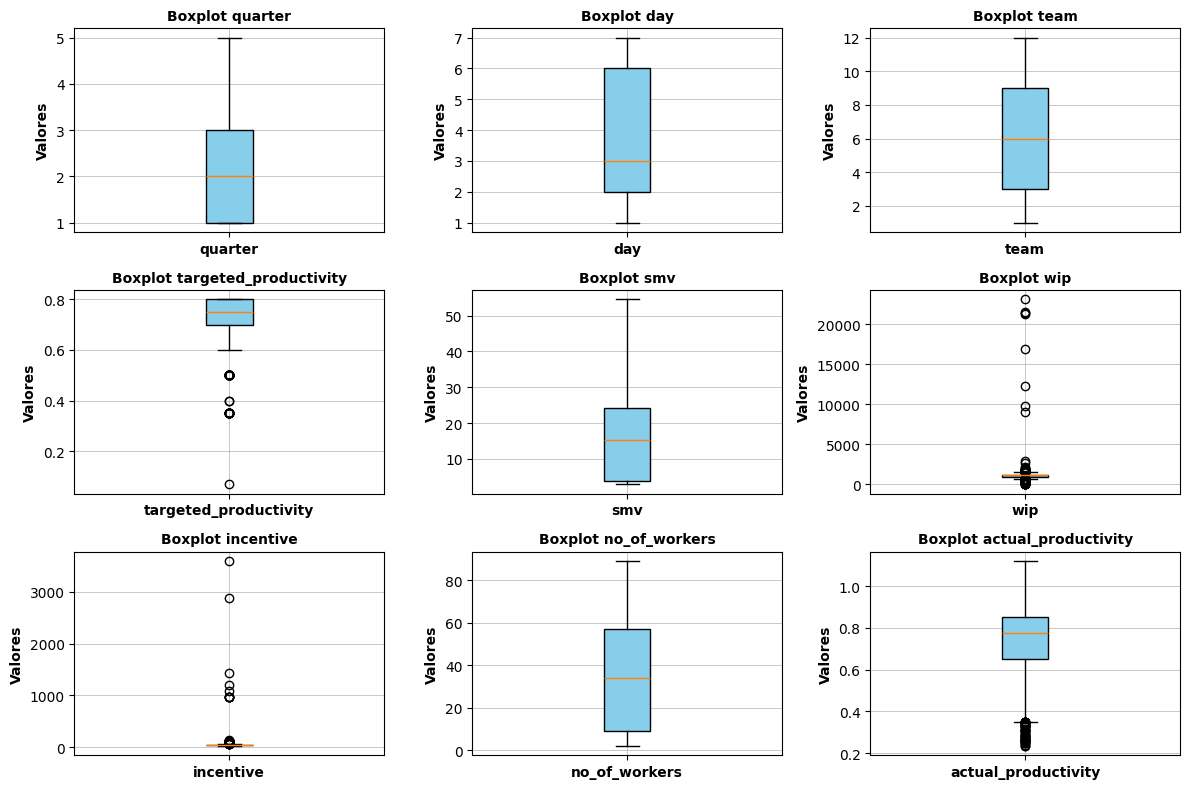

In [272]:
# Crear la figura y los subplots.
fig, axs = plt.subplots(3,3, figsize=(12, 8))
# Se deja el array en una dimension para no usar indices con dos dimensiones
axs = axs.flatten()
# Columnas numéricas a graficar
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.to_list()
# Boxplot para las columnas numéricas
prop_caja = dict(facecolor='skyblue')
for i, col in enumerate(numerical_cols[:15]):
  axs[i].boxplot(df[col], patch_artist=True, boxprops=prop_caja)
  axs[i].set_title(f"Boxplot {col}", fontsize=10, fontweight='bold')
  axs[i].set_xticklabels([col], fontweight='bold')
  axs[i].set_ylabel("Valores", fontweight='bold')
  axs[i].grid(True, linewidth=0.5)

plt.tight_layout()
plt.show()

#### Se encuentran varios outliers en columnas targed_productivity, wip y incentive
#### Los datos atipicos se dejan para no modificar la muestra y se mantenga los datos reales.

#### Esta data contiene un target continuo.
#### Se aplica modelo de Regresion lineal.

In [273]:
df["incentive"].max()

3600.0

#### Se decide cambiar el valor outlier maximo por la media de la columna

In [274]:
media = df["incentive"].mean()
df.loc[df["incentive"] == 3600, 'incentive'] = media

In [275]:
df["incentive"].max()

2880.0

In [276]:
df["targeted_productivity"].max()

0.8

In [277]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,incentive,no_of_workers,actual_productivity
0,2015-01-01,1,sweing,4,8,0.80,26.16,1108.000000,98.00,59.0,0.940725
1,2015-01-01,1,finishing,4,1,0.75,3.94,1190.465991,38.21,8.0,0.886500
2,2015-01-01,1,sweing,4,11,0.80,11.41,968.000000,50.00,30.5,0.800570
3,2015-01-01,1,sweing,4,12,0.80,11.41,968.000000,50.00,30.5,0.800570
4,2015-01-01,1,sweing,4,6,0.80,25.90,1170.000000,50.00,56.0,0.800382


In [278]:
numeric_cols = ['quarter', 'team', 'targeted_productivity', 'smv', 'wip', 'incentive', 'no_of_workers']
categorical_cols = ['department', 'day']


In [279]:
X = df.drop(columns=['actual_productivity', 'date'])
y = df['actual_productivity']

In [280]:
# Dividir los datos en conjuntos de entrenamiento y prueba con variables numéricas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [281]:
# Preprocesamiento para columnas numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#### Modelo LinearRegression


In [282]:
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_cols)

    ])

model_pipeline = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('Linear Regression', LinearRegression())
 ])

In [283]:
# Entrenamiento.
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

In [284]:
# Predecir y evaluar
y_pred = model_pipeline.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.18682673500561542
MAE: 0.10692838755837668
MSE: 0.021591755896666485
RMSE: 0.14694133488119157


#### Modelo KNeighborsRegressor

In [285]:
preprocessor_knn = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
     ])

model_knn = Pipeline(steps=[
  ('preprocessor_knn', preprocessor_knn),
  ('KNeighborsRegressor', KNeighborsRegressor())
 ])

In [286]:
# Entrenamiento.
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [287]:
# Predecir y evaluar
y_pred_knn = model_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"MSE: {mse_knn:.2f}")
print(f"R² (score): {r2_knn:.2f}")

MSE: 0.02
R² (score): 0.17


### Modelo DecisionTreeRegressor

In [288]:
preprocessor_treer = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
     ])

model_treer = Pipeline(steps=[
  ('preprocessor_treer'   , preprocessor_treer),
  ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=42))
 ])

In [289]:
# Entrenamiento.
model_treer.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_treer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['quarter', 'team',
                                                   'targeted_productivity',
                                                   'smv', 'wip', 'incentive',
                                                   'no_of_workers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'day'])])),
                ('DecisionTreeRegressor',
                 DecisionTreeRegressor(random_state=42))])

In [290]:
# Predecir y evaluar
y_pred_treer = model_treer.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred_treer))
print("MAE:", mean_absolute_error(y_test, y_pred_treer))
print("MSE:", mean_squared_error(y_test, y_pred_treer))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_treer)))


R2 Score: 0.03713985021338828
MAE: 0.09532595794583335
MSE: 0.025566311894137116
RMSE: 0.1598946900123238


#### Modelo RandomForestRegressor




In [291]:
preprocessor_rfr = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
     ])

model_rfr = Pipeline(steps=[
  ('preprocessor_rfr'     , preprocessor_rfr),
  ('RandomForestRegressor', RandomForestRegressor(random_state=42))
 ])

In [292]:
# Entrenamiento.
model_rfr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_rfr',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['quarter', 'team',
                                                   'targeted_productivity',
                                                   'smv', 'wip', 'incentive',
                                                   'no_of_workers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'day'])])),
                ('RandomForestRegressor',
                 RandomForestRegressor(random_state=42))])

In [293]:
# Predecir y evaluar
y_pred_rfr = model_rfr.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred_rfr))
print("MAE:", mean_absolute_error(y_test, y_pred_rfr))
print("MSE:", mean_squared_error(y_test, y_pred_rfr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rfr)))


R2 Score: 0.497481537715564
MAE: 0.07447570670058326
MSE: 0.013343104647308679
RMSE: 0.115512357119525


#### Modelo XGBRegressor

In [294]:
preprocessor_xgb = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
     ])

model_xgb = Pipeline(steps=[
  ('preprocessor_xgb', preprocessor_xgb),
  ('XGBRegressor'    , XGBRegressor(random_state=42))
 ])

In [295]:
# Entrenamiento.
model_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_xgb',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['quarter', 'team',
                                                   'targeted_productivity',
                                                   'smv', 'wip', 'incentive',
                                                   'no_of_workers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'day'])])),
                ('XGBRegressor',
                 XGBRegressor(base_score=None,...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [296]:
# Predecir y evaluar
y_pred_xgb = model_xgb.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

R2 Score: 0.33783594790243465
MAE: 0.08312299789045723
MSE: 0.01758208882646543
RMSE: 0.13259746915558165


#### Modelo LGBMRegressor

In [297]:
preprocessor_lgbm = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
     ])

model_lgbm = Pipeline(steps=[
  ('preprocessor_lgbm', preprocessor_lgbm),
  ('LGBMRegressor'    , LGBMRegressor(random_state=42,max_depth=5))
 ])

In [298]:
# Entrenamiento.
model_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 957, number of used features: 16
[LightGBM] [Info] Start training from score 0.732472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Pipeline(steps=[('preprocessor_lgbm',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['quarter', 'team',
                                                   'targeted_productivity',
                                                   'smv', 'wip', 'incentive',
                                                   'no_of_workers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'day'])])),
                ('LGBMRegressor', LGBMRegressor(max_depth=5, random_state=42))])

In [299]:
# Predecir y evaluar
y_pred_lgbm = model_lgbm.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred_lgbm))
print("MAE:", mean_absolute_error(y_test, y_pred_lgbm))
print("MSE:", mean_squared_error(y_test, y_pred_lgbm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))

R2 Score: 0.48058791710221294
MAE: 0.0770390366582196
MSE: 0.013791671943107427
RMSE: 0.11743794933115712


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Evaluación de los modelos utilizando validación cruzada

In [300]:
print(f"\nLinearRegression        R2 Score:{r2_score(y_test, y_pred):.2f} MAE:{mean_absolute_error(y_test, y_pred):.2f} MSE:{mean_squared_error(y_test, y_pred):.2f} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"KNeighborsRegressor     R2 Score:{r2_score(y_test, y_pred_knn):.2f} MAE:{mean_absolute_error(y_test, y_pred_knn):.2f} MSE:{mean_squared_error(y_test, y_pred_knn):.2f} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn)):.2f}")
print(f"DecisionTreeRegressor   R2 Score:{r2_score(y_test, y_pred_treer):.2f} MAE:{mean_absolute_error(y_test, y_pred_treer):.2f} MSE:{mean_squared_error(y_test, y_pred_treer):.2f} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_treer)):.2f}")
print(f"RandomForestRegressor   R2 Score:{r2_score(y_test, y_pred_rfr):.2f} MAE:{mean_absolute_error(y_test, y_pred_rfr):.2f} MSE:{mean_squared_error(y_test, y_pred_rfr):.2f} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rfr)):.2f}")
print(f"XGBRegressor            R2 Score:{r2_score(y_test, y_pred_xgb):.2f} MAE:{mean_absolute_error(y_test, y_pred_xgb):.2f} MSE:{mean_squared_error(y_test, y_pred_xgb):.2f} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")
print(f"LGBMRegressor           R2 Score:{r2_score(y_test, y_pred_lgbm):.2f} MAE:{mean_absolute_error(y_test, y_pred_lgbm):.2f} MSE:{mean_squared_error(y_test, y_pred_lgbm):.2f} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lgbm)):.2f}")


LinearRegression        R2 Score:0.19 MAE:0.11 MSE:0.02 RMSE: 0.15
KNeighborsRegressor     R2 Score:0.17 MAE:0.11 MSE:0.02 RMSE: 0.15
DecisionTreeRegressor   R2 Score:0.04 MAE:0.10 MSE:0.03 RMSE: 0.16
RandomForestRegressor   R2 Score:0.50 MAE:0.07 MSE:0.01 RMSE: 0.12
XGBRegressor            R2 Score:0.34 MAE:0.08 MSE:0.02 RMSE: 0.13
LGBMRegressor           R2 Score:0.48 MAE:0.08 MSE:0.01 RMSE: 0.12


#### El modelo elegido es RandomForestRegressor, porque tiene mayor R2-score (0.50), explica el 50% de la varianza de los datos.
#### Tiene menor error( MSE y RMSE), tiene el MSE mas bajo con (0.01) y el  RMSE mas bajo (0.12), lo que significa que sus predicciones tienen menos error cuadratico en comparación con los otros modelos, tiene mayor precisión.
#### Equilibra bien precisión y robustez.

####  Optimización de Hiperparámetros RandomForestRegressor

Espacio de Búsqueda para RandomForestRegressor
* Para optimizar un modelo de Random Forest en problemas de regresión, se debe definir un espacio de búsqueda que cubra los hiperparámetros más importantes que controlan:

* Complejidad del modelo (profundidad de árboles, número de hojas).
* Regularización (mínimo de muestras para dividir nodos).
* Diversidad del ensemble (número de árboles, muestreo de características).

#### Optimización con Gridsearch

In [314]:
# Preprocesador Randomforest
preprocessor_forest1 = ColumnTransformer(transformers=[
      ('scaler1', 'passthrough', numeric_cols),
      ("cat1", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
     ])

# Modelo Randomforest.
pipeline_forest1 = Pipeline(steps=[
    ("pp1"   , preprocessor_forest1),
    ("model1", RandomForestRegressor())
])

In [319]:
# Optimizacion de hiperparametros.
forest1_params = {
     'model1__random_state': [5, 10, 20],
     'model1__max_depth': [5, 10, 15],
     'model1__n_estimators': [100, 200, 300],
     'model1__min_samples_split': [2, 5, 10],
    }

forest1_grid = GridSearchCV(pipeline_forest1, forest1_params)
forest1_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pp1',
                                        ColumnTransformer(transformers=[('scaler1',
                                                                         'passthrough',
                                                                         ['quarter',
                                                                          'team',
                                                                          'targeted_productivity',
                                                                          'smv',
                                                                          'wip',
                                                                          'incentive',
                                                                          'no_of_workers']),
                                                                        ('cat1',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['department',
                                                                          'day'])])),
                                       ('model1', RandomForestRegressor())]),
             param_grid={'model1__max_depth': [5, 10, 15],
                         'model1__min_samples_split': [2, 5, 10],
                         'model1__n_estimators': [100, 200, 300],
                         'model1__random_state': [5, 10, 20]})

In [354]:
# Evaluación.
forest1_best = forest1_grid.best_estimator_
y_pred_forest1 = forest1_best.predict(X_test)
print("\nRandomforest optimizado con Gridsearch")
print("Mejores parámetros:", forest1_grid.best_params_)
print(f"\nR²:   {r2_score(y_test, y_pred_forest1):.2f}")
print(f"MAE:  {mean_absolute_error(y_test, y_pred_forest1):.2f}")
print(f"MSE:  {mean_squared_error(y_test, y_pred_forest1):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_forest1)):.2f}")


Randomforest optimizado con Gridsearch
Mejores parámetros: {'model1__max_depth': 10, 'model1__min_samples_split': 10, 'model1__n_estimators': 100, 'model1__random_state': 10}

R²:   0.52
MAE:  0.07
MSE:  0.01
RMSE: 0.11


Optimización con RandomizedSearchCV

In [322]:
# Preprocesador Randomforest
preprocessor_forest2 = ColumnTransformer(transformers=[
                        ('scaler2', 'passthrough', numeric_cols),
                        ("cat2", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
                    ])

# Modelo Randomforest.
pipeline_forest2 = Pipeline(steps=[
    ("pp2", preprocessor_forest2),
    ("model2",  RandomForestRegressor())
])

In [323]:
# Optimizacion de hiperparametros.

forest2_params = {
     'model2__n_estimators': randint(20, 300),
     'model2__random_state': [5, 10, 20],
     'model2__max_depth': [5, 10, 15]
}

forest2_random_search = RandomizedSearchCV(pipeline_forest2, forest2_params, n_iter=10, random_state=42)
forest2_random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('pp2',
                                              ColumnTransformer(transformers=[('scaler2',
                                                                               'passthrough',
                                                                               ['quarter',
                                                                                'team',
                                                                                'targeted_productivity',
                                                                                'smv',
                                                                                'wip',
                                                                                'incentive',
                                                                                'no_of_workers']),
                                                                              ('cat2',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['department',
                                                                                'day'])])),
                                             ('model2',
                                              RandomForestRegressor())]),
                   param_distributions={'model2__max_depth': [5, 10, 15],
                                        'model2__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d94255b6b50>,
                                        'model2__random_state': [5, 10, 20]},
                   random_state=42)

In [353]:
# Evaluación.
forest2_best = forest2_random_search.best_estimator_
y_pred_forest2 = forest2_best.predict(X_test)
print("\nRandomforest optimizado con RandomizedSearchCV")
print("Mejores parámetros:", forest2_random_search.best_params_)
print(f"\nR²:   {r2_score(y_test, y_pred_forest2):.2f}")
print(f"MAE:  {mean_absolute_error(y_test, y_pred_forest2):.2f}")
print(f"MSE:  {mean_squared_error(y_test, y_pred_forest2):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_forest2)):.2f}")


Randomforest optimizado con RandomizedSearchCV
Mejores parámetros: {'model2__max_depth': 10, 'model2__n_estimators': 211, 'model2__random_state': 5}

R²:   0.50
MAE:  0.07
MSE:  0.01
RMSE: 0.12


#### Optimización con Optuna

In [341]:
!pip install optuna

In [342]:
# Preprocesador Randomforest
preprocessor_forest3 = ColumnTransformer(transformers=[
                        ('scaler3', 'passthrough', numeric_cols),
                        ("cat3", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
                    ])

# Modelo Randomforest.
pipeline_forest3 = Pipeline(steps=[
    ("pp3", preprocessor_forest3),
    ("model3",  RandomForestRegressor())
])

In [346]:
# Optimizacion de hiperparametros con Optuna.
def objective(trial):
  params3 = {
          "n_estimators": trial.suggest_int("n_estimators", 50, 500),
          "max_depth": trial.suggest_int("max_depth", 3, 12)
  }

  model3 = Pipeline([
    ("pp3", preprocessor_forest3),
    ("model3", RandomForestRegressor(random_state=42, **params3))
  ])

  score = cross_val_score(model3, X_train, y_train, cv=3, scoring="r2", n_jobs=-1)
  return score.mean()

In [347]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
optuna_bparams = study.best_params

print("Mejores hiperparámetros (regresión):", optuna_bparams)

[I 2025-07-17 04:16:06,322] A new study created in memory with name: no-name-01502c9c-515b-4311-a808-cfdfac294f32
[I 2025-07-17 04:16:11,263] Trial 0 finished with value: 0.426391623133992 and parameters: {'n_estimators': 292, 'max_depth': 5}. Best is trial 0 with value: 0.426391623133992.
[I 2025-07-17 04:16:16,015] Trial 1 finished with value: 0.44434636953532564 and parameters: {'n_estimators': 437, 'max_depth': 7}. Best is trial 1 with value: 0.44434636953532564.
[I 2025-07-17 04:16:17,895] Trial 2 finished with value: 0.4411047659950942 and parameters: {'n_estimators': 219, 'max_depth': 9}. Best is trial 1 with value: 0.44434636953532564.
[I 2025-07-17 04:16:21,025] Trial 3 finished with value: 0.44205142594916297 and parameters: {'n_estimators': 431, 'max_depth': 8}. Best is trial 1 with value: 0.44434636953532564.
[I 2025-07-17 04:16:21,841] Trial 4 finished with value: 0.4461605302420722 and parameters: {'n_estimators': 115, 'max_depth': 7}. Best is trial 4 with value: 0.446160

Mejores hiperparámetros (regresión): {'n_estimators': 115, 'max_depth': 7}


In [348]:
# Pipeline.
model4 = Pipeline([
        ("pp", preprocessor_forest3), # Using preprocessor_forest3 as defined earlier
        ("model", RandomForestRegressor(random_state=42, **optuna_bparams))
    ])

In [349]:
# Entrenamiento.
model4.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('scaler3', 'passthrough',
                                                  ['quarter', 'team',
                                                   'targeted_productivity',
                                                   'smv', 'wip', 'incentive',
                                                   'no_of_workers']),
                                                 ('cat3',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['department', 'day'])])),
                ('model',
                 RandomForestRegressor(max_depth=7, n_estimators=115,
                                       random_state=42))])

In [352]:
# Prediccion.
y_pred4 = model4.predict(X_test)
print("\nRandomforest optimizado con optuna")
print(f"\nR²:   {r2_score(y_test, y_pred4):.2f}")
print(f"MAE:  {mean_absolute_error(y_test, y_pred4):.2f}")
print(f"MSE:  {mean_squared_error(y_test, y_pred4):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred4)):.2f}")


Randomforest optimizado con optuna

R²:   0.51
MAE:  0.08
MSE:  0.01
RMSE: 0.11


In [357]:
print(f"RandomForestRegressor Inicial             R2 Score:{r2_score(y_test, y_pred_rfr):.2f} MAE:{mean_absolute_error(y_test, y_pred_rfr):.2f} MSE:{mean_squared_error(y_test, y_pred_rfr):.2f} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rfr)):.2f}")
print(f"RandomForestRegressor Gridsearch          R2 Score:{r2_score(y_test, y_pred_forest1):.2f} MAE: {mean_absolute_error(y_test, y_pred_forest1):.2f} MSE:{mean_squared_error(y_test, y_pred_forest1):.2f} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_forest1)):.2f}")
print(f"RandomForestRegressor RandomizedSearchCV  R2 Score:{r2_score(y_test, y_pred_forest2):.2f} MAE:{mean_absolute_error(y_test, y_pred_forest2):.2f} MSE:{mean_squared_error(y_test, y_pred_forest2):.2f} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_forest2)):.2f}")
print(f"RandomForestRegressor Optuna              R2 Score:{r2_score(y_test, y_pred4):.2f} MAE:{mean_absolute_error(y_test, y_pred4):.2f} MSE:{mean_squared_error(y_test, y_pred4):.2f} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred4)):.2f}")

RandomForestRegressor Inicial             R2 Score:0.50 MAE:0.07 MSE:0.01 RMSE: 0.12
RandomForestRegressor Gridsearch          R2 Score:0.52 MAE: 0.07 MSE:0.01 RMSE: 0.11
RandomForestRegressor RandomizedSearchCV  R2 Score:0.50 MAE:0.07 MSE:0.01 RMSE: 0.12
RandomForestRegressor Optuna              R2 Score:0.51 MAE:0.08 MSE:0.01 RMSE: 0.11


#### La optimización con Gridsearch fue mas eficiente, porque logro el mejor equilibrio entre explicación de varianza (r2) y errores de prediccion (RMSE y MAE). Los hiperparametros optimos encontrados por Gridsearch, solo proporcionaron una mejora marginal con respecto al modelo inicial.